# Applied Optimization - GP2

## PJIOWA - Staff Scheduling

#### Question

General Hospital must schedule nurses so that the hospital’s patients are provided adequate
care. At the same time, in the face of tighter competition in the health care industry, careful attention must
be paid to keeping costs down. From historical records, administrators can project the minimum number
of nurses to have on hand for the various times of day (note that 0 and 24 are the same time of day):

A nurse can be scheduled to start at the beginning of one of the 8 time ranges just given, and he/she works for 9 consecutive hours. Each nurse works only one shift per 24-hour time period. If his/her shift starts late enough in the day, then he/she will work into the early hours of the next day. The nurse-scheduling problem seeks to schedule nurses to find the minimum total number of nurses required per day while providing adequate care.

Set up the model assuming that the schedule for a single day will be repeated over and over again; this means, in particular, that nurses who start late enough in the day will be counted as covering some early hours in the next day as well.

<b>Hint:</b> In formulating this problem, do not think about exactly what shifts an individual nurse will work; just think about the number of nurses who will work a given shift.

| Time Range (24 hour) | Min # of Nurses Required During Time | Shift Number (i) |
|-----------------------|-------------------------------------|--------------|
| 0-3                   | 16                                  | 1            |
| 3-6                   | 10                                  | 2            |
| 6-9                   | 6                                   | 3            |
| 9-12                  | 19                                  | 4            |
| 12-15                 | 8                                   | 5            |
| 15-18                 | 7                                   | 6            |
| 18-21                 | 14                                  | 7            |
| 21-24                 | 9                                   | 8            |


| Time       | StartTime  | EndTime    | Min(Insider) | Min(Driver) |
|------------|------------|------------|--------------|-------------|
| Lunch      | 10.00 AM   | 2.00 PM    | 2            | 2           |
| Afternoon  | 2.00 PM    | 5.00 PM    | 2            | 1           |
| Day        | 5.00 PM    | 9.00 PM    | 3            | 3           |
| Evening    | 9.00 PM    | 12.00 AM   | 2            | 3           |
| LateNight  | 12.00 AM   | 2:00 AM    | 2            | 2           |
| After      | 2:00 AM    | 3:00 AM    | 2            | 2           |


#### Model Formulation

Let $X_i$ denote the number of PJIOWA workers who start shift number $i$. <br>
Let $Z_i$ denote the min number of staff required during shift number $i$.

Objective Function: $\min \sum_{i=1}^{8} X_i$

s.t:

\begin{align*}
& X_i + X_{i-1} + X_{i-2} \geq Z_i
\end{align*}

where $i$ is the shift number,
\begin{align*}
& x_{ij} \geq 0 \quad \text{for all } i \
\end{align*}
for $i = 1, 2, 3, \ldots, 8$,
where $Z_i = [16, 10, 6, 19, 8, 7, 14, 9]$

In [1]:
# grace's 2 hour shifts
# firstly formulate how many pjiowa staff are required to start each shift
# solve with static shift length, maybe 8 per day, assuming a worker works 8*5 to cover 40 hours/week, working 5 days a week


i = list(range(8)) # shift iterator
combs = [(i[j],i[j-1],i[j-2]) for j in i] # gen different combinations to account for people starting their shift late and early
z = [16, 10, 6, 19, 8, 7, 14, 9] # min nurses required in shift [1,8]
n = len(i) # total no of shifts

# Importing the required module(s)
import pyomo.environ as pyo

# Creating a Pyomo model object
ns = pyo.ConcreteModel("Nurse Scheduling")

# Let I be the set of items indexed from 0 to n-1. Note that both bounds in RangeSet are inclusive.
ns.I = pyo.RangeSet(0, n-1)

# Declaring the decision variables (x_i). Note that x_i belongs to the [0,1] interval
ns.x = pyo.Var(ns.I, within=pyo.NonNegativeReals, name="#Nurses starting Shift")
# ns.x = pyo.Set(ns.I, within=pyo.NonNegativeReals)

# Declaring the objective function:
ns.obj = pyo.Objective(expr = sum([ns.x[i] for i in ns.I]), name="DailyReqNurses")

# Declaring the constraints (tried manual the first time)
# ns.sh1 = pyo.Constraint(expr = (ns.x[0]+ns.x[7]+ns.x[6]) >= z[0], name = "shift1")
# ns.sh2 = pyo.Constraint(expr = (ns.x[1]+ns.x[0]+ns.x[7]) >= z[1], name = "shift2")
# ns.sh3 = pyo.Constraint(expr = (ns.x[2]+ns.x[1]+ns.x[0]) >= z[2], name = "shift3")
# ns.sh4 = pyo.Constraint(expr = (ns.x[3]+ns.x[2]+ns.x[1]) >= z[3], name = "shift4")
# ns.sh5 = pyo.Constraint(expr = (ns.x[4]+ns.x[3]+ns.x[2]) >= z[4], name = "shift5")
# ns.sh6 = pyo.Constraint(expr = (ns.x[5]+ns.x[4]+ns.x[3]) >= z[5], name = "shift6")
# ns.sh7 = pyo.Constraint(expr = (ns.x[6]+ns.x[5]+ns.x[4]) >= z[6], name = "shift7")
# ns.sh8 = pyo.Constraint(expr = (ns.x[7]+ns.x[6]+ns.x[5]) >= z[7], name = "shift8")

# Trying out an indexed approach
def comb_sum(model, j):
    # print(j, flush=True)
    for k in combs:
        if k[0] == j:
            # print('returned', ns.x[k[0]] + ns.x[k[1]] + ns.x[k[2]] >= z[j])
            return ns.x[k[0]] + ns.x[k[1]] + ns.x[k[2]] >= z[j]
        else:
            # print('n/a')
            continue
# calling he indexed constraint function
ns.sh = pyo.Constraint(ns.I, rule=comb_sum)

# Solving using pyomo - glpk
opt = pyo.SolverFactory('glpk')
res = opt.solve(ns) 
ns.display()

Model Nurse Scheduling

  Variables:
    x : Size=8, Index=I
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   2.0 :  None : False : False : NonNegativeReals
          1 :     0 :  11.0 :  None : False : False : NonNegativeReals
          2 :     0 :   1.0 :  None : False : False : NonNegativeReals
          3 :     0 :   7.0 :  None : False : False : NonNegativeReals
          4 :     0 :   0.0 :  None : False : False : NonNegativeReals
          5 :     0 :   0.0 :  None : False : False : NonNegativeReals
          6 :     0 :  14.0 :  None : False : False : NonNegativeReals
          7 :     0 :   0.0 :  None : False : False : NonNegativeReals

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :  35.0

  Constraints:
    sh : Size=8
        Key : Lower : Body : Upper
          0 :  16.0 : 16.0 :  None
          1 :  10.0 : 13.0 :  None
          2 :   6.0 : 14.0 :  None
          3 :  19.0 :

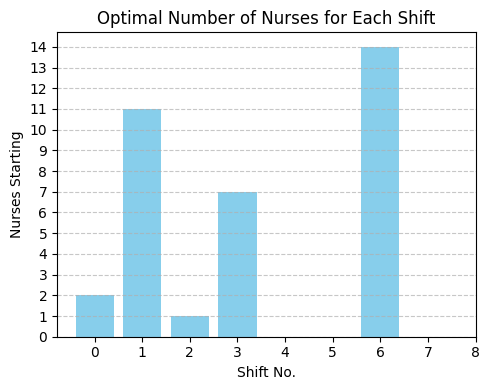

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ns_output = pd.DataFrame()
ns_output['Shift No.'] = ns.x.get_values().keys()
ns_output['Nurses Starting'] = [int(z) for z in ns.x.get_values().values()]
ns_output.set_index('Shift No.', inplace=True)
ns_output#.plot(kind='bar')

plt.figure(figsize=(5, 4))
plt.bar(ns_output.index, ns_output['Nurses Starting'], color='skyblue')
plt.xlabel('Shift No.')
plt.ylabel('Nurses Starting')
plt.title('Optimal Number of Nurses for Each Shift')
plt.xticks(range(len(ns_output)+1))
plt.yticks(range(ns_output['Nurses Starting'].max()+1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()